# Final Exam - SS 3850G / CS 4414B

## Student ID: XXXXXXXXX (XX / 100)

## General comments

This Final integrates knowledge and skills acquired during the whole semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the exam.** To finish the exam in the alloted 3 hrs, you will have to work efficiently. **Read the entirety of each question carefully.** You need to be signed into the Final Zoom session during the entire exam with your video on and pointed at yourself. 

You need to submit the final by the due date (17:00) on OWL in the Test & Quizzes / Final section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [2]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# No other packages are allowed in solving the final.   

# Basics
import pandas as pd
import numpy as np

# Models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set

Credit scoring is one of the most common applications of statistical modeling / data science techniques. Predicting whether a potential borrower will repay their obligations or will not do so (called *default*) is one of the key activities in personal and small business lending.

During this exam, you will work with a sample of granted loans taken from a local bank, as part of a financial competition that ran back in 2013. The company sponsoring it made available the following variables:

1. SeriousDlqin2yrs (binary, target variable): 1 if the borrower experienced 90 days past due delinquency or worse (default), 0 otherwise.
2. RevolvingUtilizationOfUnsecuredLines (percentage): Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. 
3. age (integer): Age of borrower in years. 
4. NumberOfTime30-59DaysPastDueNotWorse (integer): Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. DebtRatio (percentage): Monthly debt payments, alimony, living costs divided by monthy gross income.
6. NumberOfOpenCreditLinesAndLoans (integer): Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards).
7. NumberOfTimes90DaysLate (integer): Number of times borrower has been 90 days or more past due.
8. NumberRealEstateLoansOrLines (integer): Number of mortgage and real estate loans including home equity lines of credit. 
9. NumberOfTime60-89DaysPastDueNotWorse (integer): Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
10. NumberOfDependents (integer): Number of dependents in family excluding themselves (spouse, children etc.)

You get a sample of 1000 cases with a 50% default rate. The cases are stored in the attached csv file (```gsc_sample.csv```)

With this information, execute the following tasks using your knowledge from the course.


In [3]:
# Uncomment this line if using cloud installation (Colab or others)
# !gdown https://drive.google.com/uc?id=1_9tztEp7v1wBJTH91xZpTS_QDgdp4mN0

In [4]:
# Read the data
gsc_sample = pd.read_csv('gsc_sample.csv')
gsc_sample.describe()

,SeriousDlqin2yrs,age,NumberOfTime3059DaysPastDueNotWorse,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents,RevolvingUtilizationOfUnsecuredLines,DebtRatio
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.50000,49.632000,0.757000,6744.346000,8.670000,0.42700,1.026000,0.330000,0.92200,0.468928,0.365071
std,0.50025,13.829166,3.303462,11396.666095,5.065645,3.22041,1.152672,3.170986,1.18715,0.403894,0.325817
min,0.00000,22.000000,0.000000,1100.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,39.000000,0.000000,3457.750000,5.000000,0.00000,0.000000,0.000000,0.00000,0.080844,0.145849
50%,0.50000,49.000000,0.000000,5180.000000,8.000000,0.00000,1.000000,0.000000,0.00000,0.374469,0.291640
75%,1.00000,59.000000,1.000000,8000.000000,11.000000,0.00000,2.000000,0.000000,2.00000,0.877077,0.489728
max,1.00000,92.000000,98.000000,250000.000000,30.000000,98.00000,9.000000,98.000000,6.00000,2.297612,2.639328


## Task 1 (30 pts UG, 37 points PG)
Before we start working on a predictive models for whether somebody will default on a loan or not, in task 1 we will first build a model to predict the typical monthly income. Income is notoriously difficult to obtain, as people may have different sources of income, so it holds value to create income prediction models. Ultimately this model maybe useful in spotting whether somebody is in the typical income bracket. One of the main predictors of income is age, so we focus on this variable and later consider some additional variables. 

### Question 1.1 (5pts)
* Generate a bivariate scatter plot of age (x-axis) and Monthly Income (y-axis). You should be able to see two extreme observations. [1pt]
* Exclude the two observations from the data set and regenerate your bivariate scatter plot. [1pt]
* **Written answer: Is the distribution of Monthly income symmetric or skewed?** [1pt]
* **Written answer: Given the presence of outliers and the shape of the distribution of the target variable, would you prefer a L2-loss or an L1-loss for your regression model? How will the prediction of each of these models differ? Which technique will give a prediction that is closer to the median income?** [2pts]

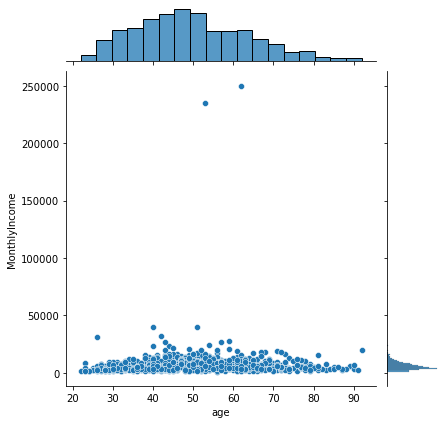

In [5]:
# Produce the scatter plot 
sns.jointplot(x=gsc_sample.age, y=gsc_sample.MonthlyIncome)
plt.show()

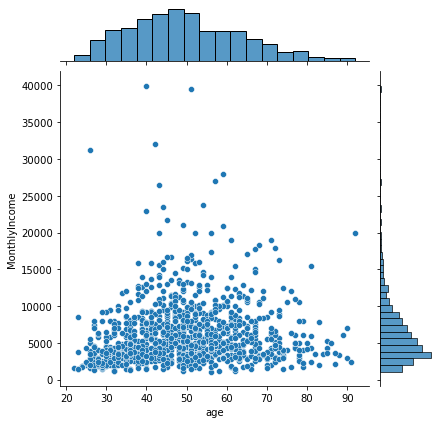

In [6]:
# Exclude outliers and replot 
D=gsc_sample[gsc_sample.MonthlyIncome<100000]
sns.jointplot(x=D.age, y=D.MonthlyIncome)
plt.show()

**Your written answers here**

**Answers**
Written answer: a regression using an L1 loss would be more robust against the influence of outliers and the influence of the right side of the distribution. It will fit a line through the median of the conditional income distribution. 

### Question 1.2 (13pts)
As a solution to the pesky distribution of Monthly income, you chose the practice solution to 
* Exclude the two highest earning cases.
* Transform the target variable from income to the natural logarithm of the monthly income.

All subsequent questions in this task will be done over this reduced and transformed data set 

To build and evaluate a baseline model take the following steps: 
* Split the data into an equal-sized training and test set (500 observations each). Use a random_state of 1.
* Build a model that predicts the log income as a quadratic function of age. To get full points, implement the feature construction and model in a pipeline  
* Fit the model using an squared-error loss (L2)
* Plot the training data and fit the model
* Calculate and report the mean-squared error over the test set 
* Using the Central limit theorem or bootstrap, calculate and report the 95% Confidence interval of the test error

In [7]:
# Exclude the outliers and transform the Monthly income variance [1pt]
D=gsc_sample[gsc_sample.MonthlyIncome<100000].copy()
D['logIncome']=np.log(D.MonthlyIncome)

The mean test error is 0.3275
The 95% Confidence interval is 0.29 - 0.37


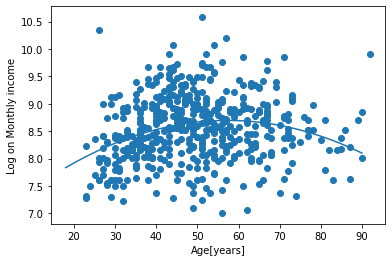

In [8]:
# Split the data: 1pt 
X = np.c_[D.age]
y = D.logIncome
[Xtrain,Xtest,ytrain,ytest]=train_test_split(X,y,test_size=500,random_state=1)

# Define and fit the model (2 pts for pipeline, 1 pt for otherwise correct fit)
model = Pipeline([('features',PolynomialFeatures(degree=2)),('GLM',LinearRegression())]) 
model.fit(Xtrain,ytrain)

# Plot training data and prediction: 3pts 
age = np.linspace(18,90,30).reshape((-1,1))
yp = model.predict(age)
ax = plt.subplot()
ax.scatter(Xtrain,ytrain)
ax.plot(age,yp)
plt.xlabel('Age[years]')
plt.ylabel('Log on Monthly income')

# Get the mean-square test error: 3pts
ypred = model.predict(Xtest)
res2  = (ytest-ypred)**2
Testerror  = np.mean(res2)

# Get standard error and CI: 3pts 
sem = np.std(res2)/np.sqrt(res2.shape[0])
CI = [Testerror-1.96 * sem, Testerror+1.96*sem]
print(f'The mean test error is {Testerror:.4f}')
print(f'The 95% Confidence interval is {CI[0]:.2f} - {CI[1]:.2f}')
plt.show()

### Question 1.3 (6pts)
Now increase the model complexity by using a 5th-order polynomial on age to predict monthly income. 
As in Question 1.2, plot the fit on the training data and report the mean squared error on the test data. 

**Written answer: Does a 5th-order polynomial offer a better model than the quadratic model in Question 1.2? Which model would you prefer? Justify your answer.**


The mean test error is 0.3272


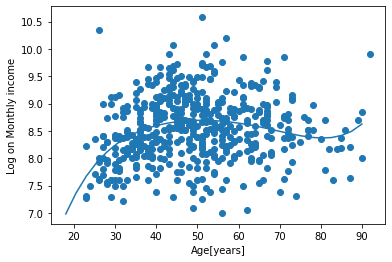

In [9]:
# Define and fit the model [1pt]
model2 = Pipeline([('features',PolynomialFeatures(degree=5)), ('GLM',LinearRegression())]) 
model2.fit(Xtrain,ytrain)

# Plot training data and prediction [1pt]
age = np.linspace(18,90,30).reshape((-1,1))
yp = model2.predict(age)
ax = plt.subplot()
ax.scatter(Xtrain, ytrain)
ax.plot(age,yp)
plt.xlabel('Age[years]')
plt.ylabel('Log on Monthly income')

# Get the root-mean-square test error [2pts] 
ypred = model2.predict(Xtest)
res2  = (ytest-ypred)**2
Testerror  = np.mean(res2)
print(f'The mean test error is {Testerror:.4f}')
plt.show()

**Your written answer here**

**Answer**

The test error for the new model is slightly lower and therefore it is a better model [2pts]
OR: 
Given that the test error is in the CI of the simpler model, I would prefer the simpler model. [2pts]


### Question 1.4 (PG only, 7pts) 
Now we want to also take the number of dependents into account in the prediction of log Income 
* Build a model that relies on the 5th-order polynomial for age and the 3rd-order polynomial of the number of dependents
* In the model do NOT include any interaction terms of the two features
* To get full points, implement the feature generation within the model pipeline (`ColumnTransformer` can be useful, or you can write your own `Transformer`)
* Report the test error and decide whether the new model provides an improvement to the last one. 

In [10]:
# Add the new variable: 1pt 
X = np.c_[D.age,D.NumberOfDependents]
y = D.logIncome
[Xtrain,Xtest,ytrain,ytest]=train_test_split(X,y,test_size=0.5,random_state=1)


# Define and fit the model (5 pts for pipeline, 3 pt for otherwise correct fit)
trans = ColumnTransformer([('agePoly', PolynomialFeatures(5),[0]),
                           ('dependentPoly', PolynomialFeatures(3),[1])])

model3 = Pipeline([('trans',trans),('GLM',LinearRegression())]) 
model3.fit(Xtrain,ytrain)

# Get the mean-square test error (1pt)
ypred = model3.predict(Xtest)
res2  = (ytest-ypred)**2
Testerror  = np.mean(res2)
print(f'The mean test error is {Testerror:.4f}')

The mean test error is 0.3158


### Question 1.5 (6pts)
You boss tells you that he only wants to use your predictive algorithm, if the predicted mean squared test error on a completely novel data set is lower than 0.33 and the 95% confidence interval does not include that value. Since you have not achieved this so far, you give your code, the training and test data set to a colleague of yours (Carl). He uses your code to play around with the number of polynomial terms for age, numberOfDependents, as well as the number and form of interaction terms. Finally he finds a model including 25 features that minimizes the test error. He then conducts a boostrap analysis to obtain a 95% confidence interval on that test error. In his final report he writes: 

*The final model has a predicted test error on unseen data of 0.29. The 95% confidence internal is 0.26 - 0.32 and the new algorithm should therefore meet the required criterion of producing a squared error of lower than 0.33 on novel data with high certainty.*  

**Written answer:  What is the problem with Carl's approach and statement? What would you have to change in the model fitting / selection / evaluation procedure to fix the problem?** 

**Your answer here**

**Answer**

Written answer: The problem is that Carl conducts the model selection using the test set. So out of all feasible models, he selects the one with the lowest test error. Thus, the test error and the corresponding CI is not an unbiased estimate of the test error on a new data set anymore. Had he only considered on single model, the test error would be valid estimator. [3pts]

To fix this problem, I should have only allowed Carl to make his decision based on the training set (for example using cross-validation) and then evaluated the test error for that one winning model. [3pts]

## Task 2: Tree-based ensemble (40 pts)

Now we will begin to model default. We will model it using a tree-based ensemble. After careful consideration, you have decided to use an XGBoosting model to create it.

### Question 2.1: XGB vs Random Forest (5 pts)

**Written answer: Why do you think XGBoosting is a better alternative than Random Forests for this particular database? Answer in terms of the number of cases, the number of variables and the properties of each model.**

**Your answer here**

**Answer:**

In general, both models use the diversity in the sampling to create a deep space search. However, Random Forests is much more stringent on how much diversity we can extract from the data, as it requires sampling variables and cases simultaneously and learning more complex trees from such division. XGBoosting, on the other hand, usually samples only cases and learns from the deflated errors (as defined by the learning rate) of the previous steps. This has been empirically shown to work better on smaller samples with limited variables, such as the ones we have available in this exam. So, XGB is at first look a better alternative for this problem.

### Question 2.2: Finding the best XGB model (20 pts)

One of your colleagues has previously done an analysis of the best parameters that can be used for the model, and has limited the choice to four potential configurations: a max_depth parameter of 3, a learning_rate value of either 0.01 or 0.1, and an n_estimators (number of trees) of either 50 trees or 200 trees. Your colleague used a random_state seed value of 20212004 everywhere possible. All the other parameters can be set at the values appropriate for a binary model seen in the course.

You will now determine which of these configurations is the best for your work. For this:

a. Starting from the original data (i.e. not using the output from Task 1), create a train / test split leaving 300 cases in the test set.

b. Create a parameter grid that can test the values that you need to test.

c. Run a grid-search using this configuration and get the values of the best parameters. Use the whole training set you created in a for this search, do not create a smaller sample. Show the value of the best parameters. (*Hint: As you will be using the whole training set, you can get the best estimator directly from the ```GridSearchCV``` object by setting the option ```refit=True```. The best estimator is then stored in the ```GRID_SEARCH_OBJECT.best_estimator_``` property, where ```GRID_SEARCH_OBJECT``` is the name of your GridSearchCV object*).

In [11]:
# Create train / test split (2 pts)
x_train, x_test, y_train, y_test = train_test_split(gsc_sample.drop(columns='SeriousDlqin2yrs'), 
                                                    gsc_sample['SeriousDlqin2yrs'],
                                                    test_size=300,
                                                    random_state=20210420)

In [12]:
# Create the parameter grid (5 pts)
param_grid = dict({'n_estimators': [50, 200],
                   'max_depth': [3],                  # This one can be left out and directly set in the model.
                   'learning_rate' : [0.01, 0.1]
                  })

In [13]:
# Create the GridSearchCV object (10 pts)

# Define the XGB model
XGB_Bankloan = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=20212004,        # Seed
                            missing=None,                 # How are nulls encoded?
                            use_label_encoder=False       # Eliminates warning
                            )

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = 2,         # Parallel jobs. -1 is "all you have"
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [14]:
# Train it and print the best parameters (3 pts)
GridXGB.fit(x_train, y_train)

print(GridXGB.best_params_)
XGB_Bankloan = GridXGB.best_estimator_ 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[18:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


**Written answer (optional, may just leave the print as above): The best parameters are the learning rate of 0.01 and 200 trees.**

Note the warning can be ignored as it refers to an internal XGB change.

### Question 2.3: Evaluating the model (10 pts)

Now that you have a model, you must check how well it works and evaluate it in the context of this problem. Perform the following tasks:

a. Apply the best model to the test set to obtain the probability of default for each element.

b. Create a ROC curve plot that shows the value of the AUC you obtained. **Written answer: What can you say about the model performance?**

c. Create a variable importance plot showing which variables contribute the most to the model prediction.

In [15]:
# Apply to the test set (2 pt)
probTest = XGB_Bankloan.predict_proba(x_test)
probTest = probTest[:, 1]

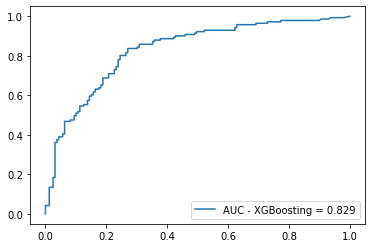

In [16]:
# Plot the ROC curve and show the AUC (2 pts)

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_test, 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - XGBoosting = " + str(auc))
plt.legend(loc=4)
plt.show()

**Your written answer here (2 pt)**

**Written answer: The model has a very good performance, with an AUC value of 0.829. It can predict very accurately defaulters from non-defaulters.**

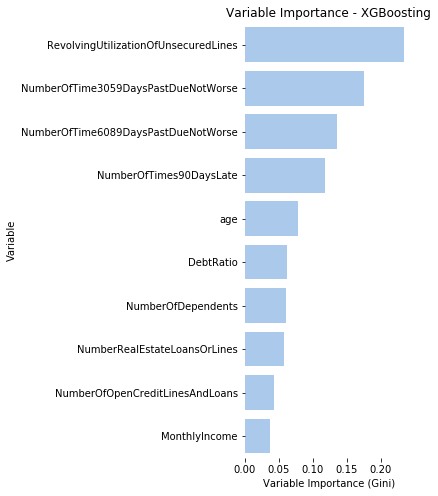

In [17]:
# Create the variable importance plot (4 pts)**

importances = XGB_Bankloan.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance - XGBoosting")
sns.set_color_codes("pastel")
sns.barplot(y=[x_train.columns[i] for i in indices], x=importances[indices], 
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance (Gini)")
sns.despine(left=True, bottom=True)

### Question 2.4: Fairness (5 pts)

Your colleague Carl says that you probably neglected to include the full zipcode as a predictive variable in the model. You know this is a bad idea due to fairness concerns. Explain to your colleague what are the issues with including such a variable to make real-world decisions in the context of model fairness. In this context, explain what we would need to see in the model decisions to achieve Demographic Parity, Equalized Opportunities, and Equalized Odds for protected characteristics (gender, ethnicity, religion, etc).

(*Hint: Remember that the full zipcode allows identifying particular neighborhoods, and those neighborhoods can have specific ethnicities and gender compositions*)

**Your answer here**

**Answer**

Using zipcode as a predictive variable can bring severe issues when included in a predictive model. 

- [1pt] For demographic parity, obviously including zipcode will create an unbalanced demographic distribution. The estimations will be different for each zipcode so there will be specific differences between the groups.
- [2pts] For equalized opportunities to be present, we would want people to have the same error rate across the protected attributes. By using zipcode, the model will be more or less accurate depending on the default rate of each zipcode, so equalized opportunities will not occur.
- [2pts] For equalized odds, the model must give the same acceptance rates for every protected characteristic. This will clearly not occur, as using zipcode will explicitely alter the odds of this occurring as zipcode is correlated with protected characteristics. 

## Task 3: Unsupervised learning (30 pts)

After you have corrected him twice, Carl has now argued you should not construct just one model but several ones, as you probably have several disjoint clusters in your data. Your colleague says running a clustering model will clearly show this.

To test your colleague's idea, you propose to run a K-Means model and using dimensionality reduction to plot the resulting analysis.

### Question 3.1 Data normalization (5 pts)

Explain why it is a good idea to normalize the data for a K-Means clustering process. Then train a ```MinMaxScaler``` method over your full dataset ```gsc_sample```, excluding the target variable.

**Your written answer here (3 pts)**

**Answer: As we saw in the lectures, not normalizing data can cause that variables with a high magnitude (such as income in this example) are much more dominant in how the clusters are formed. Normalized data avoids this.**

In [18]:
# Normalizer (2 pts)
normalizer = MinMaxScaler()

# Train and apply it. Here I keep the data frame structure, but this is not needed.
gsc_cluster_data =  pd.DataFrame(normalizer.fit_transform(gsc_sample.drop(columns=['SeriousDlqin2yrs'])),
                                 index=gsc_sample.drop(columns=['SeriousDlqin2yrs']).index,
                                 columns=gsc_sample.drop(columns=['SeriousDlqin2yrs']).columns
                                ) 

### Question 3.2 K-Means Clustering (15 pts)

Your colleague has mentioned they think there are between three and five clusters in the data. You decide to run a silhouette analysis over the data to answer these questions. Create a silhouette plot for 3, 4 and 5 clusters and calculate the corresponding silhouette scores. Use a random seed of 20210420 for your cluster functions.

**Written answer: How many clusters would you say the silhouette analysis show are in the data? Why?**

For n_clusters = 3 The average silhouette_score is : 0.2177
For n_clusters = 4 The average silhouette_score is : 0.2173
For n_clusters = 5 The average silhouette_score is : 0.2002


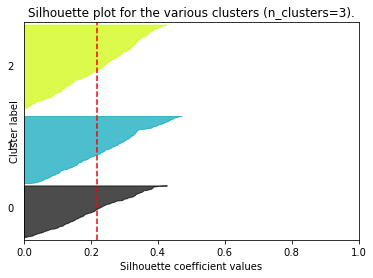

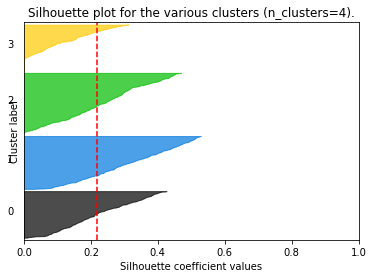

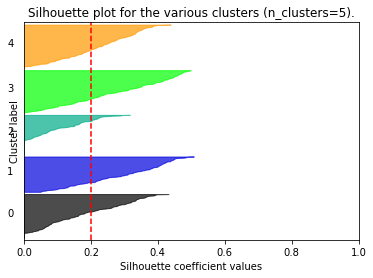

In [19]:
# Code for the clustering and silhouette plots (12 pts)

range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(gsc_cluster_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
    cluster_labels = clusterer.fit_predict(gsc_cluster_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(gsc_cluster_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is : %.4f"  % silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(gsc_cluster_data, cluster_labels)

    y_lower = 10
    
    # Iterate over the clusters
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters (n_clusters=%i)." % (n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

**Your written answer here (3 pts)**

**Answer**

We want:
- All clusters to be close to the average.
- No large variation between the silhouette plot sizes.
- No clusters below the average.

With that in mind, it seems there are three clusters in the data. Three clusters is also the number with the highest silhouette score, which is consistent with the analysis of the plot.

### Question 3.3: Visualizing your cluster model (10 pts)

After running the above analysis you have decided a certain number of clusters. However, you are not convinced these clusters are actually well-defined groups. You decide to visualize the clusters to identify whether there are actually any groups at all.

a. Run a PCA model over the normalized data keeping two components. Show the percentage of explained variance of these two components. (5 pts)

b. Create a scatterplot using these two components as axes of the plot, colouring the points of the plot depending on which cluster they belong to. (2 pts)

c. **Written answer: Do you think there are real, distinct clusters in the data? Why or why not? To achieve a good prediction, do you think you need to create a separate predictive model for each cluster? Or would a single predictive model for the entire data set be enough? (3 pts)**

Total explained variance: 55.14 %


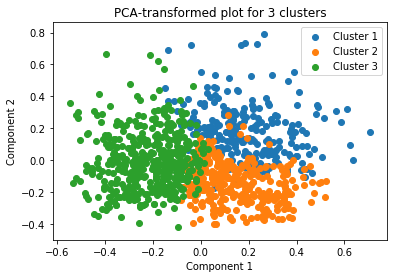

In [20]:
# Calculate PCA
PCA_transformer = PCA(2)
PCA_data = PCA_transformer.fit_transform(gsc_cluster_data)
print('Total explained variance: %.2f %%' % (np.sum(PCA_transformer.explained_variance_ratio_)*100))

# For three clusters. Note the students can use as many as they chose to use in the last question.
n_clusters = 3
clusterer = KMeans(n_clusters=n_clusters, random_state=20210420)
cluster_labels = clusterer.fit_predict(gsc_cluster_data)

# Plot!
for i in range(n_clusters):
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.scatter(PCA_data[cluster_labels==i, 0], PCA_data[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()
plt.show()

**Answer (3 pts)**

The plot is sufficiently reliable as the explained variance is pretty high (52%). While there does seem to be some groups, there is no low density area between them. This means one of the assumptions of clustering, the assumption that there are zones of low density between the groups, is not correct. With that in mind, one model should be sufficient to predict this data.

*Additional note: Banks are legally required to do this analysis to understand if they should have more than one scorecard. The analysis above is one method to do it.*

## Task 4 (Graduate students only): Neural Networks (35 pts)

Your boss has argued that neural networks are the best model in the known universe, so you should be using that instead of a tree ensemble. You know that for structured data this is not necessarily correct, so you intend to show this is the case.

You have been given a data iterator to use for your train data, given below.

In [21]:
# Data iterators. Run first.
class StructuredDataset(Dataset):
    def __init__(self, x, y):
        super(StructuredDataset, self).__init__()
        assert x.shape[0] == y.shape[0]
        if torch.cuda.is_available():
            device = 'cuda'
        else:
            device = 'cpu'
        self.x_data = torch.as_tensor(x, device=device, dtype=torch.float)
        self.y_data = torch.as_tensor(y, device=device, dtype=torch.float)


    def __len__(self):
        return self.y_data.shape[0]

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

### Question 4.1 Preparing the data. (5 pts)

In order to train a neural network, you need to first normalize the data and then create the iterator for the training set. Apply a ```MinMaxScaler``` to both the training and the testing data (you can reuse the one from Task 3) and create a ```DataLoader``` object you can use to feed data to the neural network. Use a batch size of 32.

In [22]:
# Normalizer. Important to train in training data and applying in testing data (2 pts)
normalizer = MinMaxScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

# Define the dataset and create iterator. (3 pts)
traindata = StructuredDataset(x_train_norm, y_train)

batch_size = 32
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True)

### Question 4.2 Designing your architecture. (15 pts)

Now you are ready to create your architecture. After much effort, you have identified that a dense structure with one hidden layer is the best model you can create. Extend the ```torch.nn.Module``` class to create an architecture with the following properties:

- The number of inputs to the network are the normalized features from Q4.1
- The hidden layer should have 32 units with ReLU transfer function.
- An output layer using Sigmoid output activation function with 1 neuron of output size (as it is a binary problem).

Initialize your model using an adequate number of input features.

In [23]:
# Define the architecture [15 pts]
class NonLinearModel(torch.nn.Module):
    
    def __init__(self, input_size, num_classes=1):
        
        super().__init__()
        
        # Neural Network Architecture
        self.dense1 = torch.nn.Linear(in_features=num_features, out_features=32)
        self.activation1 = torch.nn.ReLU()
        self.dense2 = torch.nn.Linear(in_features=32, out_features=num_classes)
        self.activation2 = torch.nn.Sigmoid()

    def forward(self, X):
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.activation2(X)
        return X

In [24]:
#Initiate the model first.
num_features = 10
model = NonLinearModel(num_features, 1)

### Question 4.3 Training the model (15 pts)

Now you are ready to train the model. Train the model using the following parameters:

- 500 epochs (iterations).
- SGD optimizer with a learning rate of 0.01.
- Criterion for the optimizer given by BCELoss. BCE stands for "Binary Cross Entropy".

After every epoch, save the AUC over the training set and the test set. Create a plot showing the evolution of the training and testing set AUC. *Hint: This plot does NOT need to be live. You can simply store the AUC over the train and test set after every epoch and plot it at the end.*

**Written answer [2 pts]: What do you think about the model performance compared to Task 2? After how many rounds do you think the model should training be stopped?**

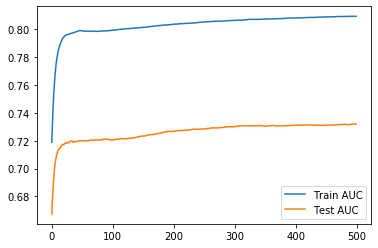

In [25]:
# Train! [10 pts]
max_iter = 500
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.BCELoss()

loss_list = []
mse_list = []
valid_list = []

for i in range(max_iter):
    epoch_loss = 0
    for index, (data, label) in enumerate(trainloader):
        optimizer.zero_grad()
        y_pred = model(data)
        loss = criterion(input=y_pred, target=label.reshape(-1, 1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"Batch %i loss: %0.3f" % (index+1, loss.item()), end='\r')
    
    # Save the data for the plot [2 pts]
    with torch.no_grad():
        y_pred = model.forward(torch.Tensor(x_train_norm))
        mse_list.append(roc_auc_score(y_true=y_train, y_score=y_pred))
        y_pred_val = model.forward(torch.Tensor(x_test_norm))
        valid_list.append(roc_auc_score(y_true=y_test, y_score=y_pred_val))

# Plot (1 pt)
plt.plot(mse_list, label='Train AUC')
plt.plot(valid_list, label = 'Test AUC')
plt.legend()
plt.show()

**Your written answer here**

**Answer: The model stopped learning after around 100 epochs, where we see the testing curve going flat. The performance of the model is much lower than the XGB model, as expected, as the latter is much better suited for structured data.**